#Logistic Regression

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('country_wise_latest.csv')

df1 = df.select_dtypes(include=['number'])
df1.head()

X = df1.drop('Confirmed' , axis=1)
y = df1['Confirmed']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

df1.dropna()


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

print("Accuracy score : " , accuracy_score(y_test , y_pred))



ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

print("Accuracy score : " , accuracy_score(y_test , y_pred))



ValueError: Input X contains infinity or a value too large for dtype('float64').

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , fmt='d' , annot=True , cmap='Purples')
plt.title("Confusion matrix of new deaths using logistic regression")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('country_wise_latest.csv')
#df1 = df.select_dtypes(include=['number'])

X= df1.drop('Recovered' , axis=1)
y = df['Recovered']

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)




In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('country_wise_latest.csv')

# Step 1: Drop rows with missing values
df = df.dropna()

# Step 2: Encode the target column (Confirmed) into categories
# Example: Classify into High (1) and Low (0) based on median
median_val = df['Confirmed'].median()
df['Confirmed_Class'] = df['Confirmed'].apply(lambda x: 1 if x >= median_val else 0)

# Step 3: Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 4: Define X and y
X = df_encoded.drop(['Confirmed', 'Confirmed_Class'], axis=1)
y = df_encoded['Confirmed_Class']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Step 6: Logistic Regression model
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))

# Step 8: Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('country_wise_latest.csv')

# Replace inf/-inf with NaN and drop missing
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Convert target into binary classification (e.g., high vs low)
median_val = df['Confirmed'].median()
df['Confirmed_Class'] = df['Confirmed'].apply(lambda x: 1 if x >= median_val else 0)

# Drop non-numeric and original target column
df = df.drop(columns=['Country/Region', 'Confirmed'], errors='ignore')

# Encode categorical columns (if any remain)
df = pd.get_dummies(df, drop_first=True)

# Features and label
X = df.drop('Confirmed_Class', axis=1)
y = df['Confirmed_Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))


Accuracy score: 0.972972972972973


c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score is : 0.02631578947368421


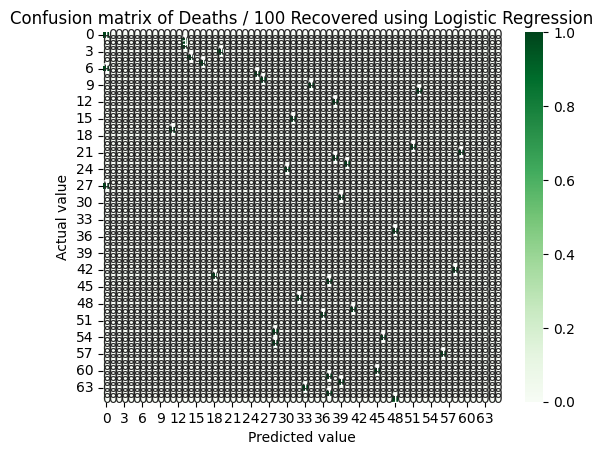

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('country_wise_latest.csv')
df1 = df.select_dtypes(include=['number'])

X= df1.drop('Deaths / 100 Recovered' , axis=1)
y = df1['Recovered']

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Accuracy score is :" , accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test , y_pred)

sns.heatmap(cm , fmt='d' , annot=True , cmap='Greens')

plt.title('Confusion matrix of Deaths / 100 Recovered using Logistic Regression')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")

plt.show()

